# Часть 1. Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Задание 1 ★☆☆

Изобразите график функции по заданным точкам x и y.
Подпишите оси, дайте название графику, изобразите сетку серым цветом прерывистой линией толщиной 0.3.  
Изобразите график в диапазоне $x$ от -20 до 20  и $y$ от -20 до 20.

In [2]:
t = np.linspace(-20, 20, 1000)
x = 16 * np.power(np.sin(t), 3)
y = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)

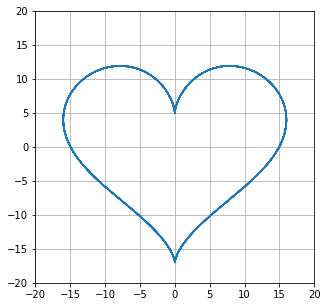

In [6]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.grid(True)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.plot(x, y)
# TODO

На что похож график функции?  
Варианты в форме:
   - цветок
   - вертикальная восьмерка
   - сердечко 
   - ничего из вышеперечисленного

# Задание 2 ★★☆

Изобразите 6 графиков (2 x 3) функции  
$$f(x) = \frac{15}{\sqrt{(225 - x^2)^2 + 4z^2x^2}}$$ 
для различных значений параметра $z$.   
Для каждого графика сделайте подписи осей, нарисуйте сетку, подпишите график в соответвии со значением параметра $z$ графики должны быть достаточно разнесены, так чтобы надписи не перекрывались. Все графики должны быть в одинаковом масштабе, выберете пределы изменений для $x$ и $y$ самомтоятельно.

[1.  0.8 0.6 0.4 0.2 0. ]


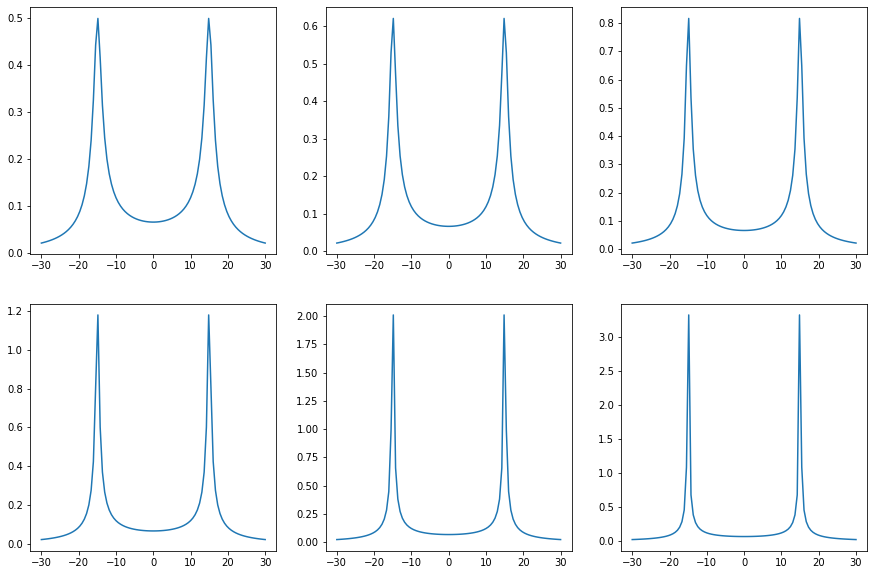

In [21]:
z = np.linspace(0, 1, 6)[::-1]
print(z)
def f(z, x):
    return 15 / np.sqrt( (225 - x**2)**2 + 4*(z**2)*(x**2) )


fig, ax = plt.subplots(2, 3, figsize=(15,10))

x = np.linspace(-30, 30, 100)
ax[0][0].plot(x, f(z[0], x))
ax[0][1].plot(x, f(z[1], x))
ax[0][2].plot(x, f(z[2], x))
ax[1][0].plot(x, f(z[3], x))
ax[1][1].plot(x, f(z[4], x))
ax[1][2].plot(x, f(z[5], x))

Какое физическое явление иллюстрируют эти графики?  
Варианты в форме:
   -  биения
   -  резонанс  
   -  свободные колебания
   -  затухание

# Часть 2. Seaborn 

В этой части задания попробуйте использовать `seaborn`.

In [26]:
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")

Проанализируем данные из уже знакомого [детесета](https://archive.ics.uci.edu/ml/datasets/Student+Performance#), в котором содержатся данные об успеваемости учеников старших классов.
Описание полей вы можете найти на [сайте](https://archive.ics.uci.edu/ml/datasets/Student+Performance#)

Считайте файл в переменную `data`.

In [23]:
data = pd.read_csv("data/student-mat.csv", sep=";")
data.shape

(395, 33)

# Задание  3 ★☆☆

Посмотрите на распределение девочек и мальчиков

In [25]:
# TODO
data['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

В данной выборке больше:
   - девочек
   - мальчиков
   - одинаковое количество девочек и мальчиков

# Задание 4 ★☆☆

Визуализируйте распределение уровня образования родителей (матери и отца отдельно). Воспользуйтесь библиотекой `seaborn`.

In [33]:
data.Medu.value_counts()

4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64

In [34]:
data.Fedu.value_counts()

2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64

Выберете верные утверждения:
   - среди мам больше тех, кто имеет высшее образование 
   - среди пап больше тех, кто имеет высшее образование
   - среди пап большинство имеют 9 классов образования 
   - среди мам большинство имеют 9 классов образования 

# Задание 5 ★★☆

Посмотрите на распределение оценок 'G3' в зависимости от желания получать высшее образования (higher). Воспользуйтесь `FacetGrid`, а затем `kdeplot` (смотри семинар), также воспользуйтесь `boxplot`.

In [37]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

<Figure size 1080x720 with 0 Axes>

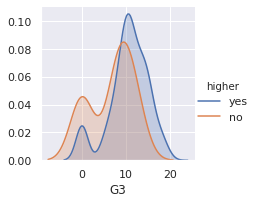

In [43]:
# TODO try to use FacetGrid + kdeplot
fig = plt.figure(figsize=(15,10))
fg = sns.FacetGrid(data, hue="higher") #, xlim=(0, 80))
fg.map(sns.kdeplot, "G3", shade=True).add_legend();

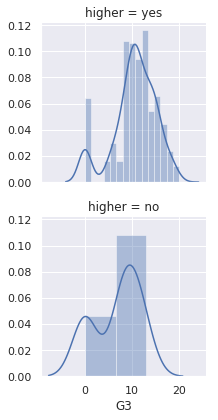

In [47]:
fg = sns.FacetGrid(data, row="higher") #, xlim=(0, 80))
fg.map(sns.distplot, "G3").add_legend();

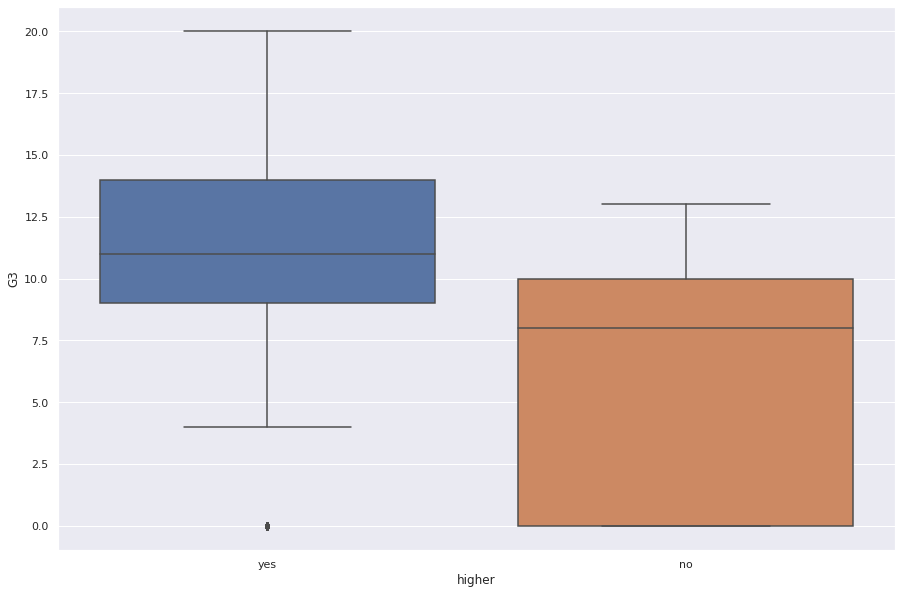

In [53]:
sns.boxplot(y="G3", x='higher', data=data)

Выберете верное утверждениe\ия:
   - медиана оценки для тех, кто хочет получать высшее образования выше, чем у остальных 
   - медиана оценки для тех, кто хочет получать высшее образования ниже, чем у остальных 
   - межквартильный размах по оценкам шире у тех, кто хочет получать высшее образования  
   - межквартильный размах по оценкам шире у тех, кто не хочет получать высшее образования  

# Задание 6 ★★☆

Постройте `pointplot`, который отражает зависимость финальных оценок `G3` от того, кто опекун и раздельно или нет живут родители на одном графике. Отберите только те данные, для которых опекун или отец или мать.

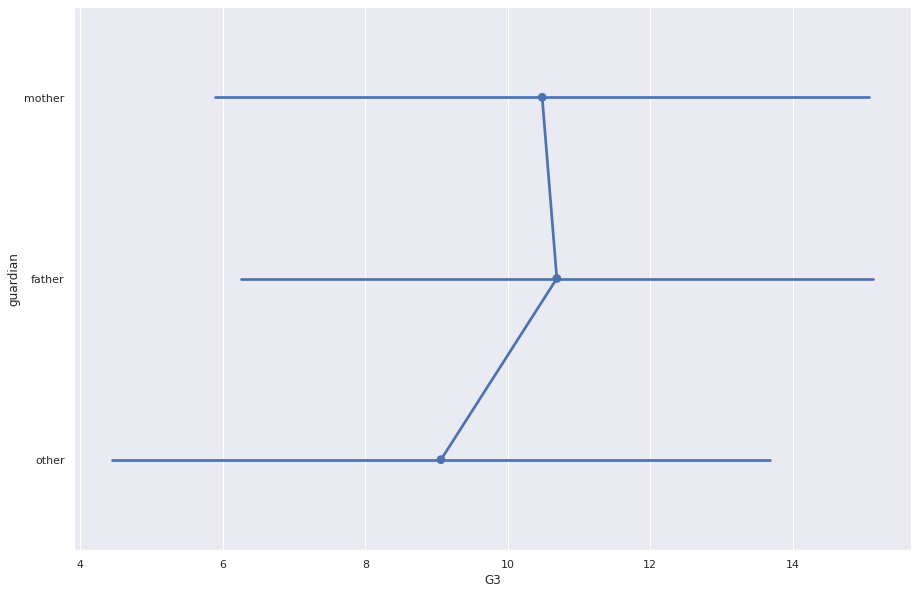

In [52]:
sns.pointplot('G3', 'guardian', data=data, ci='sd')

Выберете верное утверждение\ия:  
   - по графику видно, что среднее значение оценки выше у тех, кто воспитывается только матерью 
   - по графику видно, что медиана оценки ниже у тех, кто воспитывается только отцом
   - по графику видно, что доверительный интервал для оценок детей из полных семей меньше, чем у неполных 
   - по графику видно, что стандартное отклонение для оценок детей из неполных семей больше, чем у полных семей

# Задание 7 ★☆☆

Постройте линейную регрессию зависимости G3 от studytime (`lmplot` или `regplot`).

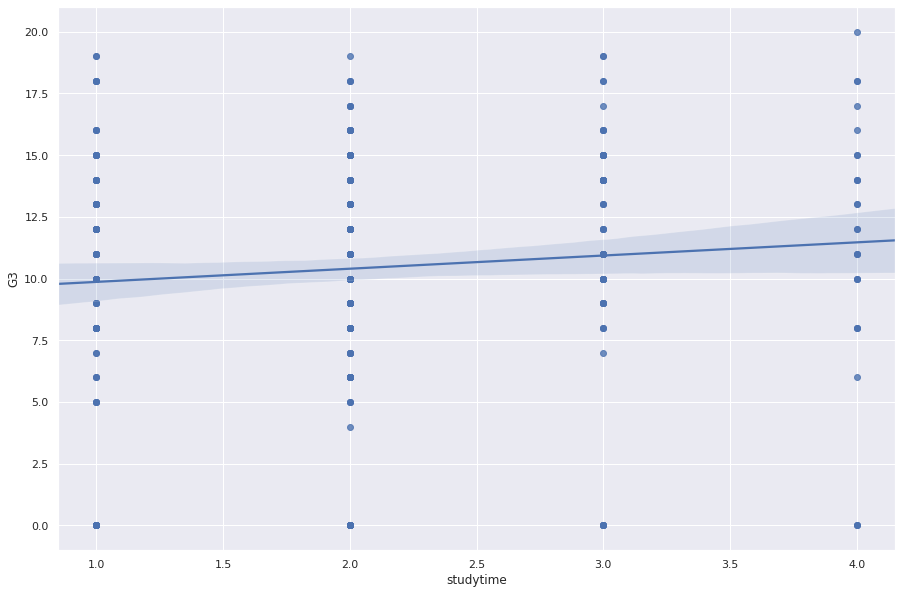

In [56]:
sns.regplot('studytime', 'G3', data)

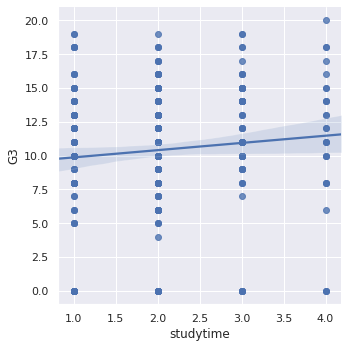

In [57]:
sns.lmplot('studytime', 'G3', data)

Выберете верное утверждение\ия:  
   - полученная зависимость иллюстрирует положительную зависимость между учебным временем и оценкой
   - полученная зависимость иллюстрирует отрицательную зависимость между учебным временем и оценкой

# Задание 8 ★☆☆

Посмотрите как доступность интернета ('internet') влияет на успеваемость ('G3'). Постройте boxplot посмотрите на медиану оценок.

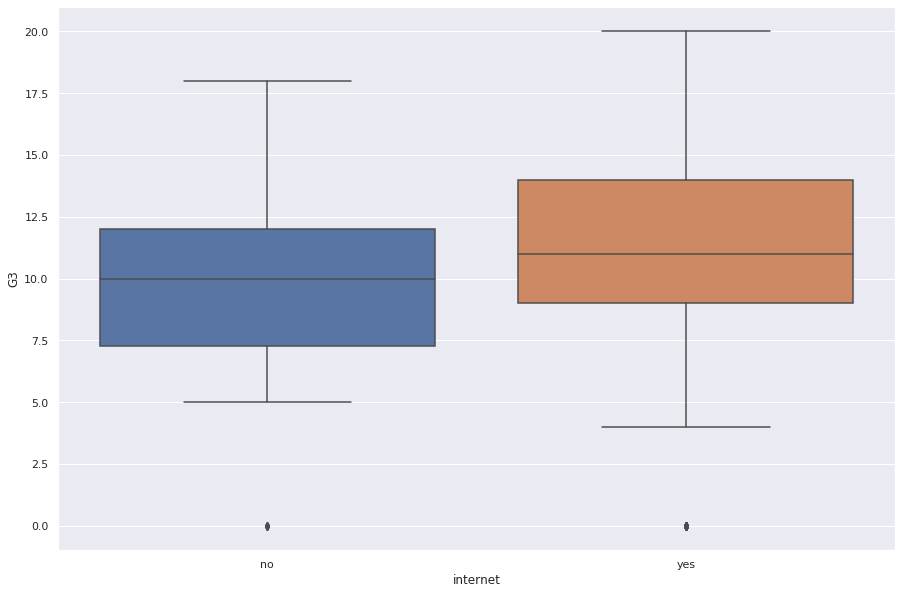

In [59]:
sns.boxplot(x='internet', y='G3', data=data)

Выберете верное утверждение\ия:
   - медиана оценки для тех, у кого есть доступ к интернету дома выше, чем у тех, у кого доступа нет  
   - медиана оценки для тех, у кого нет доступа к интернету дома выше, чем у тех, у кого доступ есть